# Analyse de la structure de bandes électroniques du RbLaS2

## Téléchargement de la structure de bande 

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from matplotlib import pyplot as plt 
from tabulate import tabulate
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure import plotter
import numpy as np

In [2]:
#mission 8
print("Téléchargement de la structure de bande du RbLaS2...")
m = MPRester("H45GsyS7rpfkZzFI")
bandstructure = m.get_bandstructure_by_material_id("mp-9361")
print("Téléchargement terminé !")

Téléchargement de la structure de bande du RbLaS2...
Téléchargement terminé !


In [3]:
#initialisation des données et variables utiles par la suite
plot = plotter.BSPlotter(bandstructure)
data = plot.bs_plot_data()
zero_energy = data.get('zero_energy')
distance = data.get('ticks').get('distance')
labels = data.get('ticks').get('label')
distances = data.get('distances')
energy = data.get('energy')
bandgap = bandstructure.get_band_gap()
vbmData = bandstructure.get_vbm()
cbmData = bandstructure.get_cbm()

## Analyse de la bande interdite 

In [4]:
print(tabulate([["Énergie de la bande interdite : ",str(bandgap.get('energy'))+" eV"],
	            ["Bande interdite directe ? ",str(bandgap.get('direct'))],
	            ["Transition dans la bande interdite : ",str(bandgap.get('transition'))]],
	            headers=["",""]))


------------------------------------  ---------------------
Énergie de la bande interdite :       2.6856999999999998 eV
Bande interdite directe ?             False
Transition dans la bande interdite :  \Gamma-F


Comme la bande interdite a une énergie supérieure à 2 eV, on peut dire du cristal qu'il a un comportement isolant au niveau électrique.

En outre, la bande interdite est indirecte. Cela veut dire que le minimum de la bande de conduction et le maximum de la bande de valence correspondent à des vecteurs d'onde différents. En effet le vecteur d'onde évolue selon une direction $\Gamma-F$ dans la bande interdite.

## Analyse de la dernière bande de valence

In [5]:
print("Maximum de la dernière bande de valence : ")
print(tabulate([["Bande(s) contenant le VBM : ",str(vbmData.get('band_index'))],
	            ["Énergie du VBM : ",str(vbmData.get('energy'))+" eV"],
	            ["(sur le graphe MP (E-Efermi) : ",str(vbmData.get('energy')-zero_energy)+" eV)"]],
	            headers=["",""]))

Maximum de la dernière bande de valence : 

------------------------------  -----------------------------------------------------
Bande(s) contenant le VBM :     defaultdict(<class 'list'>, {<Spin.up: 1>: [14, 15]})
Énergie du VBM :                2.3445 eV
(sur le graphe MP (E-Efermi) :  0.0 eV)


Les bandes contenant le maximum de la bande de valence sont donc les bandes 14 et 15. La bande 15 est donc la dernière bande de valence.

## Analyse de la première bande de conduction

In [6]:
print("Minimum de la première bande de conduction : ")
print(tabulate([["Bande(s) contenant le CBM : ",str(cbmData.get('band_index'))],
	            ["Énergie du CBM : ",str(cbmData.get('energy'))+" eV"],
	            ["(sur le graphe MP (E-Efermi) : ",str(cbmData.get('energy')-zero_energy)+" eV)"]],
	            headers=["",""]))

Minimum de la première bande de conduction : 

------------------------------  -------------------------------------------------
Bande(s) contenant le CBM :     defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})
Énergie du CBM :                5.0302 eV
(sur le graphe MP (E-Efermi) :  2.6856999999999998 eV)


La bande contenant le minimum de la bande de conduction est la bande 16, la première bande de conduction.

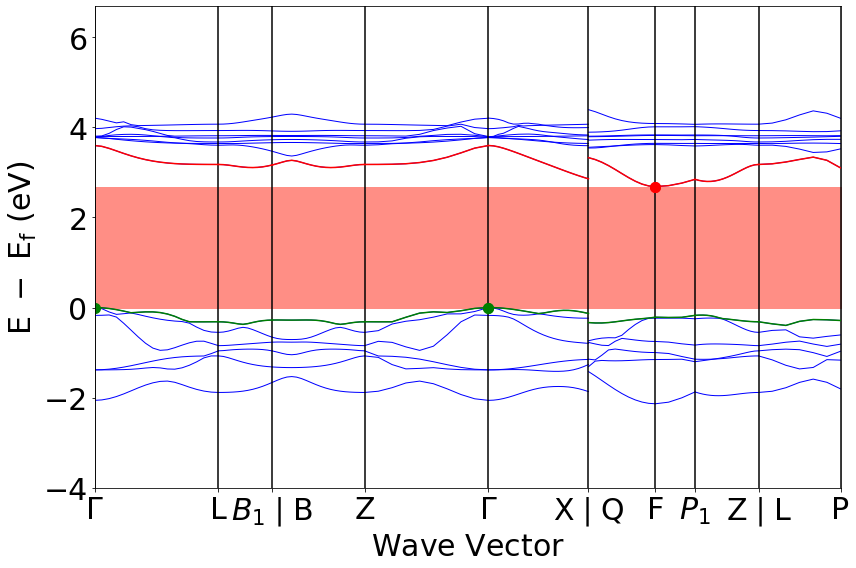

In [7]:
#affichage de la structure de bandes électroniques
plot.get_plot()
plt.fill_between(np.linspace(distance[0],distance[-1],500),0,bandgap.get('energy'),color="#FF8E85")

for i in range(len(distances)):
	plt.plot(distances[i],energy[i].get('1')[15],'g')
	plt.plot(distances[i],energy[i].get('1')[16],'r')

cbms = data.get('cbm')
for i in range(len(cbms)):
	(a,b) = cbms[i]
	plt.plot(a,b,'or',markersize=10)
vbms = data.get('vbm')
for i in range(len(vbms)):
	(a,b) = vbms[i]
	plt.plot(a,b,'og',markersize=10)

Sur le graphe ci-dessus, on peut voir la structure de bande électronique du RbLaS2. 

La bande interdite est en rouge pâle. La dernière bande de valence et la première bande de conduction sont respectivement tracées en vert et rouge.

Le point rouge représente le *Conduction Band Minimum (CBM)* et les points verts représentent le *Valence Band Maximum (VBM)*. 

## Dispersions maximale et minimale sur la dernière bande de valence et la première bande de conduction

In [8]:
#calcule la pente sur l'intervalle (x,y)
#renvoit un tableau pour un affichage pratique des flèches : 
#    pour chaque intervalle entre 2 kpoints : [pente,x_0,y_0,dx,dy]
def slope(x,y):
	return np.array([abs((y[-1]-y[0])/(x[-1]-x[0])),x[0],y[0],x[-1]-x[0],y[-1]-y[0]])

#calcule la dispersions maximale et minimale de la bande y
#retourne : s=tableau des résultats retournés par slope pour chaque intervalle de kpoints
#           l'indice de la pente maximale dans s
#           l'indice de la pente minimale dans s
def computeDispersions(y):
	slopes = np.zeros((len(distances),5))
	for i in range(len(slopes)):
		slopes[i] = slope(distances[i],energy[i].get('1')[y])
	s = (slopes.T)
	return (s,np.argmax(s[0]),np.argmin(s[0]))

(cbs,maxCb,minCb) = computeDispersions(16)
(vbs,maxVb,minVb) = computeDispersions(15)

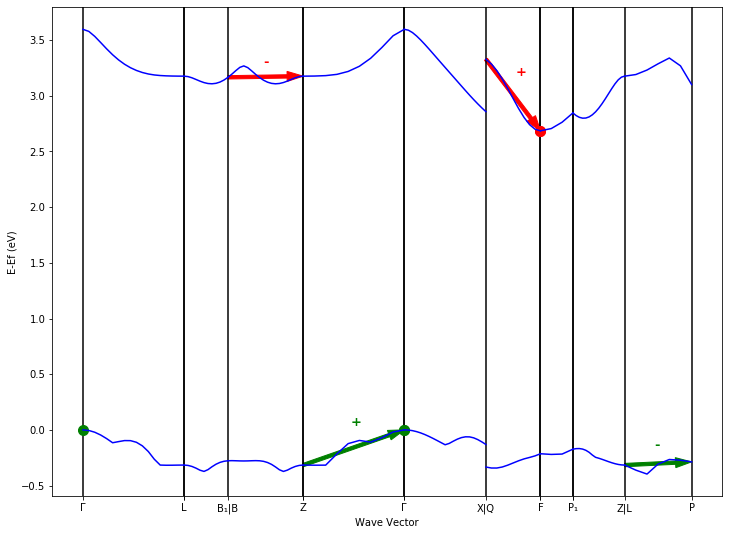

In [9]:
fig,ax = plt.subplots(1,1,figsize=(12,9))
for i in range(len(distance)):
	plt.axvline(distance[i],0,color="black")
    
for i in range(len(vbms)):
	(a,b) = vbms[i]
	plt.plot(a,b,'og',markersize=10)
for i in range(len(cbms)):
	(a,b) = cbms[i]
	plt.plot(a,b,'or',markersize=10)
    
for i in range(len(distances)):
	plt.plot(distances[i],energy[i].get('1')[15],'b')
	plt.plot(distances[i],energy[i].get('1')[16],'b')
    
ax.set_xticks(distance)
ax.set_xticklabels(['\u0393','L',"",'B\u2081|B','Z',"",'\u0393',"",'X|Q','F',"",'P\u2081',"",'Z|L','P'])
ax.set_xlabel('Wave Vector')
ax.set_ylabel('E-Ef (eV)')

plt.arrow(cbs[1,maxCb],cbs[2,maxCb],cbs[3,maxCb],cbs[4,maxCb],color='red',width=0.03,length_includes_head=True)
plt.arrow(cbs[1,minCb],cbs[2,minCb],cbs[3,minCb],cbs[4,minCb],color='red',width=0.03,length_includes_head=True)
plt.arrow(vbs[1,maxVb],vbs[2,maxVb],vbs[3,maxVb],vbs[4,maxVb],color='green',width=0.03,length_includes_head=True)
plt.arrow(vbs[1,minVb],vbs[2,minVb],vbs[3,minVb],vbs[4,minVb],color='green',width=0.03,length_includes_head=True)

plt.text(cbs[1,maxCb]+0.25,cbs[2,maxCb]-0.15,"+",fontsize=13,fontweight='bold',color='red')
plt.text(cbs[1,minCb]+0.3,cbs[2,minCb]+0.1,"-",fontsize=13,fontweight='bold',color='red')
plt.text(vbs[1,maxVb]+0.4,vbs[2,maxVb]+0.35,"+",fontsize=13,fontweight='bold',color='green')
plt.text(vbs[1,minVb]+0.25,vbs[2,minVb]+0.15,"-",fontsize=13,fontweight='bold',color='green')

plt.show()

La dernière bande de valence présente donc le plus de dispersion dans la direction $Z-\Gamma$ et le moins de dispersion dans la direction $Z|L-P$.

La première bande de conduction présente donc le plus de dispersion dans la direction $X|Q-F$ et le moins de dispersion dans la direction $B_1|B-Z$.